In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/Users/Guoli/Documents/Data Science Material/Projects/BCG/Task 2/ml_case_training_data.csv')

In [4]:
data.shape

(16096, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [6]:
# 'campaign_disc_ele' has all null values
data = data.drop(['campaign_disc_ele'], axis = 1)

In [7]:
data_churn = pd.read_csv('C:/Users/Guoli/Documents/Data Science Material/Projects/BCG/Task 2/ml_case_training_output.csv')
data_churn.head(3)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0


In [8]:
data_churn.shape

(16096, 2)

In [9]:
churn_total = data_churn.groupby(data_churn['churn']).count()
churn_percentage = churn_total/churn_total.sum()*100
churn_percentage

,id
churn,
0,90.090706
1,9.909294


In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
 """
 Plot stacked bars with annotations
 """
 ax = dataframe.plot(kind="bar",
 stacked=True,
figsize=size_,
rot=rot_,
title=title_)
 # Annotate bars
 annotate_stacked_bars(ax, textsize=14)
 # Rename legend
 plt.legend(["Retention", "Churn"], loc=legend_)
 # Labels
 plt.ylabel("Company base (%)")
 plt.show()


def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    '''
    Add value annotations to the bars
    '''
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        #calculate annotations
        value = str(round(p.get_height(),1))
        #if value is 0 donot annotate
        if value =='0.0':
            continue
        ax.annotate(value,
                    ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize,
                   )
            


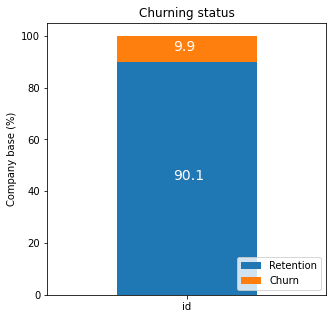

In [11]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")


About 10% of the of total customers have churned.

In [12]:
#Put two dataframes together
data['churn'] = data_churn['churn']

check statistical summary of all the quantitative variables of dataset.

In [13]:
data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


Identifying Outliers with Interquartile Range (IQR)

In [14]:
Q1 = data.quantile(0.010)
Q3 = data.quantile(0.990)
MIQR = Q3 - Q1
print(MIQR)

cons_12m                    3.957724e+06
cons_gas_12m                9.315016e+05
cons_last_month             4.692100e+05
forecast_base_bill_ele      2.988201e+03
forecast_base_bill_year     2.988201e+03
forecast_bill_12m           2.669321e+04
forecast_cons               2.136867e+03
forecast_cons_12m           1.853463e+04
forecast_cons_year          1.999005e+04
forecast_discount_energy    3.000000e+01
forecast_meter_rent_12m     3.595605e+02
forecast_price_energy_p1    1.368190e-01
forecast_price_energy_p2    1.305250e-01
forecast_price_pow_p1       1.838925e+01
imp_cons                    1.936229e+03
margin_gross_pow_ele        1.216764e+02
margin_net_pow_ele          1.197242e+02
nb_prod_act                 3.000000e+00
net_margin                  1.382302e+03
num_years_antig             8.000000e+00
pow_max                     9.970000e+01
churn                       1.000000e+00
dtype: float64


In [15]:
#print(data < (Q1 - 1.5 * MIQR)) | (data > (Q3 + 1.5 * MIQR))

Delete very higher or lower outliers

In [16]:
data_1 = data[~((data < (Q1 - 1.5 * MIQR)) |(data > (Q3 + 1.5 * MIQR))).any(axis=1)]
data_1.shape


(15835, 32)

In [17]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15835 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15835 non-null  object 
 1   activity_new              6434 non-null   object 
 2   channel_sales             11744 non-null  object 
 3   cons_12m                  15835 non-null  int64  
 4   cons_gas_12m              15835 non-null  int64  
 5   cons_last_month           15835 non-null  int64  
 6   date_activ                15835 non-null  object 
 7   date_end                  15833 non-null  object 
 8   date_first_activ          3428 non-null   object 
 9   date_modif_prod           15678 non-null  object 
 10  date_renewal              15796 non-null  object 
 11  forecast_base_bill_ele    3428 non-null   float64
 12  forecast_base_bill_year   3428 non-null   float64
 13  forecast_bill_12m         3428 non-null   float64
 14  foreca

Now let's check the missing values.

In [18]:
null_values_1 = data_1.isna().sum()
null_values_1

id                              0
activity_new                 9401
channel_sales                4091
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12407
date_modif_prod               157
date_renewal                   39
forecast_base_bill_ele      12407
forecast_base_bill_year     12407
forecast_bill_12m           12407
forecast_cons               12407
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      122
forecast_meter_rent_12m         0
forecast_price_energy_p1      122
forecast_price_energy_p2      122
forecast_price_pow_p1         122
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           12
margin_net_pow_ele             12
nb_prod_act                     0
net_margin                     14
num_years_antig                 0
origin_up     

In [43]:
null_values_1 = null_values_1[null_values_1 > 0]
null_values1_percentage = round(null_values_1 / len(data_1), 4) * 100
pd.DataFrame({'Number of null values': null_values_1, 'Percentage': null_values1_percentage})

,Number of null values,Percentage
activity_new,9401,59.37
channel_sales,4091,25.84
date_end,2,0.01
date_first_activ,12407,78.35
date_modif_prod,157,0.99
date_renewal,39,0.25
forecast_base_bill_ele,12407,78.35
forecast_base_bill_year,12407,78.35
forecast_bill_12m,12407,78.35
forecast_cons,12407,78.35


We can see that columns 'activity_new', 'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', and 'forecast_bill_12m' have significant amount of missing values, so we can remove it.

In [44]:
data_2 = data_1.drop(['activity_new', 'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_bill_12m', 'forecast_cons'], axis = 1)
data_2.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0


In [45]:
null_values_2 = data_2.isna().sum()
null_values_2

id                             0
channel_sales               4091
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       2
date_modif_prod              157
date_renewal                  39
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy     122
forecast_meter_rent_12m        0
forecast_price_energy_p1     122
forecast_price_energy_p2     122
forecast_price_pow_p1        122
has_gas                        0
imp_cons                       0
margin_gross_pow_ele          12
margin_net_pow_ele            12
nb_prod_act                    0
net_margin                    14
num_years_antig                0
origin_up                     86
pow_max                        3
churn                          0
dtype: int64

In [46]:
null_values_2 = null_values_2[null_values_2 > 0]
null_values2_percentage = round(null_values_2 / len(data_2), 4) * 100
null_frame = pd.DataFrame({'Number of null values': null_values_2, 'Percentage': null_values2_percentage})
null_frame

,Number of null values,Percentage
channel_sales,4091,25.84
date_end,2,0.01
date_modif_prod,157,0.99
date_renewal,39,0.25
forecast_discount_energy,122,0.77
forecast_price_energy_p1,122,0.77
forecast_price_energy_p2,122,0.77
forecast_price_pow_p1,122,0.77
margin_gross_pow_ele,12,0.08
margin_net_pow_ele,12,0.08


In [47]:
data_2.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.583500e+04,1.583500e+04,15835.000000,15835.000000,15835.000000,15713.000000,15835.000000,15713.000000,15713.000000,15713.000000,15835.000000,15823.000000,15823.000000,15835.000000,15821.000000,15835.000000,15832.000000,15835.000000
mean,1.837763e+05,2.880609e+04,17700.875971,2278.346841,1732.528702,0.981035,69.808238,0.136666,0.053115,43.786028,180.946832,22.667249,22.345903,1.287401,211.362319,5.012251,20.123820,0.099590
std,6.363726e+05,1.572265e+05,67975.861374,3377.173551,3575.933315,5.125129,74.517733,0.023629,0.048586,3.846059,348.028420,21.107130,21.511348,0.632228,268.932017,1.656867,18.685788,0.299461
min,-1.252760e+05,-3.037000e+03,-91386.000000,-16689.260000,-19057.000000,0.000000,-242.960000,0.092453,0.000000,35.555768,-1824.080000,-61.520000,-194.780000,1.000000,-2031.150000,1.000000,1.000000,0.000000
25%,5.862500e+03,0.000000e+00,0.000000,521.050000,0.000000,0.000000,16.250000,0.115237,0.000000,40.606701,0.000000,12.360000,12.300000,1.000000,51.670000,4.000000,12.500000,0.000000
50%,1.518000e+04,0.000000e+00,889.000000,1186.250000,373.000000,0.000000,19.450000,0.142881,0.086163,44.311378,45.230000,21.090000,21.090000,1.000000,118.520000,5.000000,13.856000,0.000000
75%,4.895950e+04,0.000000e+00,4023.500000,2681.135000,1964.000000,0.000000,131.445000,0.146348,0.098837,44.311378,217.245000,29.640000,29.640000,1.000000,273.590000,6.000000,19.800000,0.000000
max,6.286272e+06,2.055098e+06,771203.000000,43634.950000,48782.000000,30.000000,725.170000,0.273963,0.195975,59.266378,4402.570000,272.880000,272.880000,8.000000,3407.650000,16.000000,255.000000,1.000000


Frome the above statistical summary we can see that there are 0.81% of missing values in the column 'forecast_discount_energy' and rest values are all zeros.

In [48]:
data_2 = data_2.drop(['forecast_discount_energy'], axis = 1)

Next to check columns with missing values.

In [49]:
data_2.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0


In [50]:
data_2.channel_sales.value_counts(dropna = False)

foosdfpfkusacimwkcsosbicdxkicaua    7315
NaN                                 4091
lmkebamcaaclubfxadlmueccxoimlema    2018
usilxuppasemubllopkaafesmlibmsdf    1434
ewpakwlliwisiwduibdlfmalxowmwpci     959
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [51]:
data_2['channel_sales'].fillna('n/a', inplace = True)

In [52]:
# date_end: registered date of the end of the contract
#data_2['date_end'].fillna('n/a', inplace = True)
#data_2 = data_2[data_2.date_end != 'n/a']
pd.DataFrame(data_2['date_end'].value_counts(dropna = False)).head(10)

,date_end
2016-02-01,148
2016-08-01,136
2016-09-01,120
2016-12-31,117
2016-10-05,116
2016-10-25,109
2016-03-01,101
2016-09-02,98
2016-06-01,94
2016-07-01,91


In [53]:
data_2['date_end'].unique()

array(['2016-11-06', '2016-06-15', '2016-08-30', '2016-04-16',
       '2016-03-30', '2016-04-08', '2016-03-07', '2016-12-09',
       '2016-12-02', '2016-04-21', '2016-09-23', '2016-05-04',
       '2016-07-11', '2016-11-26', '2016-10-30', '2017-01-22',
       '2016-10-31', '2016-12-01', '2016-04-20', '2016-02-15',
       '2016-07-25', '2016-05-27', '2016-05-28', '2016-10-01',
       '2016-03-04', '2016-12-31', '2016-04-04', '2016-02-27',
       '2016-12-07', '2016-11-17', '2016-07-12', '2016-12-12',
       '2016-09-20', '2016-07-07', '2016-08-06', '2016-07-03',
       '2016-10-10', '2016-03-28', '2016-11-04', '2016-06-22',
       '2016-03-12', '2016-06-08', '2016-11-23', '2016-09-01',
       '2016-07-09', '2016-02-29', '2016-03-15', '2016-04-28',
       '2016-08-01', '2016-02-14', '2016-03-05', '2016-10-09',
       '2016-03-13', '2016-04-09', '2016-12-20', '2016-11-01',
       '2016-12-17', '2016-04-01', '2017-01-06', '2016-04-10',
       '2017-01-08', '2016-01-28', '2016-06-09', '2016-

In [54]:
data_2['date_end'] = pd.to_datetime(data_2['date_end']) # convert string Date time into Python Date time object.

data_2['end_month'] = [x.year * 100 + x.month  for x in data_2['date_end']]
data_2.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,end_month
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,201611.0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,201606.0
2,d29c2c54acc38ff3c0614d0a653813dd,n/a,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,201608.0


In [55]:
data_2.end_month.value_counts()

201611.0    1493
201612.0    1491
201606.0    1483
201610.0    1478
201602.0    1430
201603.0    1420
201609.0    1231
201608.0    1230
201607.0    1227
201605.0    1212
201604.0    1084
201701.0     943
201601.0     106
201706.0       3
201305.0       1
200608.0       1
Name: end_month, dtype: int64

<AxesSubplot:xlabel='count', ylabel='end_month'>

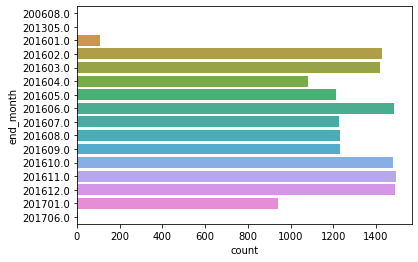

In [56]:
sns.countplot(y = data_2['end_month'], data = data_2 )

We can see that most customers registered the date of the end of the contract were in 2016-10, 2016-11, 2016-12, and 2016-03, 2016-06, 2016-02, i.e. the last period or the first period of a year.

In [57]:
data_2['date_modif_prod'].isna().sum()

157

In [58]:
data_2['date_renewal'].isna().sum()

39

In [59]:
data_2['date_modif_prod'].fillna(data_2['date_end'], inplace = True)

In [60]:
data_2['date_renewal'].fillna('n/a', inplace = True)

In [61]:
null_frame

,Number of null values,Percentage
channel_sales,4091,25.84
date_end,2,0.01
date_modif_prod,157,0.99
date_renewal,39,0.25
forecast_discount_energy,122,0.77
forecast_price_energy_p1,122,0.77
forecast_price_energy_p2,122,0.77
forecast_price_pow_p1,122,0.77
margin_gross_pow_ele,12,0.08
margin_net_pow_ele,12,0.08


In [62]:
data_2.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'origin_up', 'pow_max', 'churn', 'end_month'],
      dtype='object')

In [63]:
data_2['forecast_price_energy_p1'].fillna(data_2['forecast_price_energy_p1'].mean(), inplace = True)
data_2['forecast_price_energy_p2'].fillna(data_2['forecast_price_energy_p2'].mean(), inplace = True)
data_2['forecast_price_pow_p1'].fillna(data_2['forecast_price_pow_p1'].mean(), inplace = True)
data_2['margin_gross_pow_ele'].fillna(data_2['margin_gross_pow_ele'].mean(), inplace = True)

In [64]:
data_2['margin_net_pow_ele'].fillna(data_2['margin_net_pow_ele'].mean(), inplace = True)
data_2['net_margin'].fillna(data_2['net_margin'].mean(), inplace = True)
data_2['pow_max'].fillna(data_2['pow_max'].mean(), inplace = True)

In [65]:
data_2.origin_up.value_counts(dropna = False)

lxidpiddsbxsbosboudacockeimpuepw    7698
kamkkxfxxuwbdslkwifmmcsiusiuosws    4479
ldkssxwpmemidmecebumciepifcamkci    3569
NaN                                   86
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [66]:
data_2['origin_up'].fillna('n/a', inplace = True)

In [67]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15835 entries, 0 to 16095
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15835 non-null  object        
 1   channel_sales             15835 non-null  object        
 2   cons_12m                  15835 non-null  int64         
 3   cons_gas_12m              15835 non-null  int64         
 4   cons_last_month           15835 non-null  int64         
 5   date_activ                15835 non-null  object        
 6   date_end                  15833 non-null  datetime64[ns]
 7   date_modif_prod           15834 non-null  object        
 8   date_renewal              15835 non-null  object        
 9   forecast_cons_12m         15835 non-null  float64       
 10  forecast_cons_year        15835 non-null  int64         
 11  forecast_meter_rent_12m   15835 non-null  float64       
 12  forecast_price_ene

In [68]:
data_2.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,end_month
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,201611.0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2016-06-15 00:00:00,2015-06-23,0.00,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,201606.0
2,d29c2c54acc38ff3c0614d0a653813dd,n/a,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,201608.0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,201604.0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,201603.0


In [69]:
data_2.churn.value_counts(dropna =False)

0    14258
1     1577
Name: churn, dtype: int64

In [70]:
data_2.to_csv('C:/Users/Guoli/Documents/Data Science Material/Projects/BCG/Task 2/data_2.csv')
my_data = data_2.copy()

In [71]:
my_data.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,end_month
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,...,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,201611.0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2016-06-15 00:00:00,2015-06-23,0.0,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,201606.0


Check if there is any duplicates

In [72]:
my_data[my_data.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,end_month


### cons_12 & cons_gas_12m & cons_last_month vs churn

<AxesSubplot:xlabel='cons_12m'>

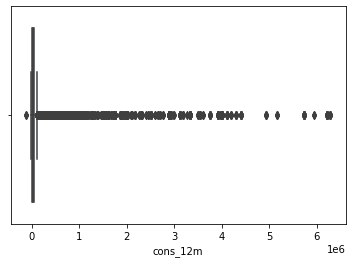

In [73]:
sns.boxplot(my_data['cons_12m'])

In [74]:
cons_12m = my_data[['cons_12m', 'churn']]
cons_12m_1 =cons_12m[cons_12m['churn']==1]
cons_12m_0 = cons_12m[cons_12m['churn'] == 0]

In [75]:
cons_12m_1.head()

,cons_12m,churn
1,0,1
7,8302,1
8,45097,1
26,21097,1
29,3584,1


In [76]:
cons_12m_0.head()

,cons_12m,churn
0,309275,0
2,4660,0
3,544,0
4,1584,0
5,121335,0


In [77]:
cons_gas_12m = my_data[['cons_gas_12m', 'churn']]
cons_gas_12m_1 = cons_gas_12m[cons_gas_12m['churn'] == 1]
cons_gas_12m_0 = cons_gas_12m[cons_gas_12m['churn'] == 0]

In [78]:
cons_last_month = my_data[['cons_last_month', 'churn']]
cons_last_month_0 = cons_last_month[cons_last_month['churn'] == 0]
cons_last_month_1 = cons_last_month[cons_last_month['churn'] == 1]

In [79]:
forecast_cons_12m = my_data[['forecast_cons_12m', 'churn']]
forecast_cons_12m_1 =forecast_cons_12m[forecast_cons_12m['churn']==1]
forecast_cons_12m_0 = forecast_cons_12m[forecast_cons_12m['churn'] == 0]

In [80]:
forecast_cons_year = my_data[['forecast_cons_year', 'churn']]
forecast_cons_year_1 =forecast_cons_year[forecast_cons_year['churn']==1]
forecast_cons_year_0 = forecast_cons_year[forecast_cons_year['churn'] == 0]

In [81]:
avg_cons_12m = pd.DataFrame({'churn_customer_cons':[cons_12m_1.cons_12m.mean(),cons_gas_12m_1.cons_gas_12m.mean(), cons_last_month_1.cons_last_month.mean(), forecast_cons_12m_1.forecast_cons_12m.mean(), forecast_cons_year_1.forecast_cons_year.mean() ], 'stay_customer_cons': [cons_12m_0.cons_12m.mean(),cons_gas_12m_0.cons_gas_12m.mean(), cons_last_month_0.cons_last_month.mean(), forecast_cons_12m_0.forecast_cons_12m.mean(), forecast_cons_year_0.forecast_cons_year.mean()], 'tot_customer_cons':[my_data['cons_12m'].mean(), my_data['cons_gas_12m'].mean(), my_data['cons_last_month'].mean(), my_data['forecast_cons_12m'].mean(), my_data['forecast_cons_year'].mean()]}, index = ['ele_cons_12m', 'gas_cons_12m', 'ele_cons_last_month', 'forecast_cons_12m', 'forecast_cons_year'])
avg_cons_12m

,churn_customer_cons,stay_customer_cons,tot_customer_cons
ele_cons_12m,87770.348129,194395.015570,183776.316451
gas_cons_12m,9878.878884,30899.530299,28806.093780
ele_cons_last_month,7555.204185,18823.033665,17700.875971
forecast_cons_12m,2306.116398,2275.275401,2278.346841
forecast_cons_year,1641.769816,1742.567050,1732.528702


<AxesSubplot:title={'center':'Average ele and gas consumption for last 12 months'}>

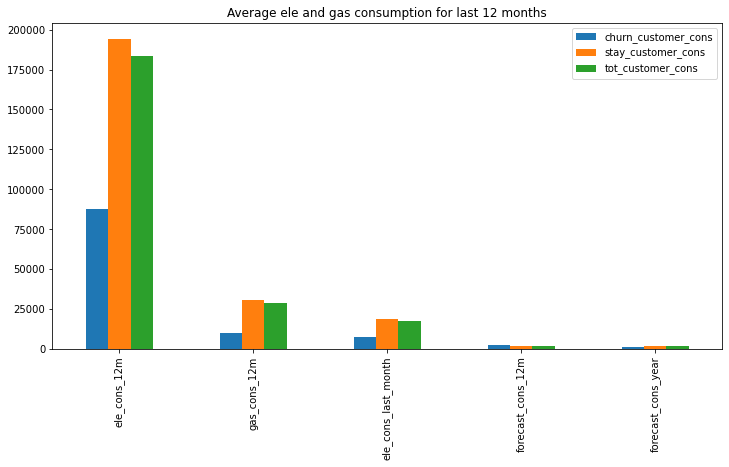

In [82]:
avg_cons_12m.plot(kind = 'bar', figsize = (12, 6), title = 'Average ele and gas consumption for last 12 months')

From above we can see thatthe average consumption of electricity and gas of the churn customers were mush less than the customers who stay with the company in the last 12 months. The reason could be the churn customers didn't use the services that much for the last 12 months.

On the other hand, the the average consumptions of the forecast for 12 months or year doesn't say much difference about the churn group.



In [83]:
my_data = my_data.drop(['forecast_cons_year'], axis = 1)

In [84]:
my_data['forecast_meter_rent_12m'].mean()

69.80823808020206

In [85]:
forecast_priceng_p1 = my_data[['forecast_price_energy_p1', 'churn']]
forecast_priceng_p1_1 = forecast_priceng_p1[forecast_priceng_p1['churn'] == 1]
forecast_priceng_p1_0 = forecast_priceng_p1[forecast_priceng_p1['churn'] == 0]

forecast_priceng_p2 = my_data[['forecast_price_energy_p2', 'churn']]
forecast_priceng_p2_1 = forecast_priceng_p2[forecast_priceng_p2['churn'] == 1]
forecast_priceng_p2_0 = forecast_priceng_p2[forecast_priceng_p2['churn'] == 0]

forecast_pricepower_p1 = my_data[['forecast_price_pow_p1', 'churn']]
forecast_pricepower_p1_1 = forecast_pricepower_p1[forecast_pricepower_p1['churn'] == 1]
forecast_pricepower_p1_0 = forecast_pricepower_p1[forecast_pricepower_p1['churn'] == 0]

In [86]:
#avg_forcast_p1p2 = pd.DataFrame({'forecast_energy_price_churn': [forecast_priceng_p1_1.forecast_price_energy_p1.mean(), forecast_priceng_p2_1.forecast_price_energy_p2.mean()], 'forecast_energy_price_stay':[forecast_priceng_p1_0.forecast_price_energy_p1.mean(), forecast_priceng_p2_0.forecast_price_energy_p1.mean()] }, index =['energy price p1', 'energy price p2'])

In [87]:
avg_price = pd.DataFrame({'forecast_avg_price_churn': [forecast_priceng_p1_1.forecast_price_energy_p1.mean(),forecast_priceng_p2_1.forecast_price_energy_p2.mean(), forecast_pricepower_p1_1.forecast_price_pow_p1.mean()],'forecast_avg_price_stay':[forecast_priceng_p1_0.forecast_price_energy_p1.mean(),forecast_priceng_p2_0.forecast_price_energy_p2.mean(), forecast_pricepower_p1_0.forecast_price_pow_p1.mean()]}, index =['energy_price_p1', 'energy_price_p2', 'power_price_p1'])
avg_price

,forecast_avg_price_churn,forecast_avg_price_stay
energy_price_p1,0.135397,0.136806
energy_price_p2,0.056502,0.052740
power_price_p1,43.552390,43.811869


<AxesSubplot:title={'center':'forecast average price for p1 and p2'}>

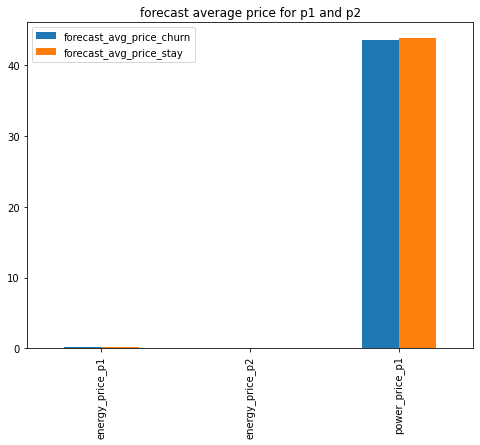

In [88]:
avg_price.plot(kind = 'bar', figsize = (8,6), title = 'forecast average price for p1 and p2')

From above we can see that there are not much price difference between the churn customers and nonchurn customers.

In [89]:
my_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'origin_up', 'pow_max', 'churn', 'end_month'],
      dtype='object')

#### channel_sales vs churn

In [90]:
my_data.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7315
n/a                                 4091
lmkebamcaaclubfxadlmueccxoimlema    2018
usilxuppasemubllopkaafesmlibmsdf    1434
ewpakwlliwisiwduibdlfmalxowmwpci     959
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [91]:
channel = my_data[['id', 'channel_sales', 'churn']]

channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level =1).fillna(0)
channel

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,877.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6404.0,911.0
lmkebamcaaclubfxadlmueccxoimlema,1904.0,114.0
n/a,3767.0,324.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1288.0,146.0


In [92]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

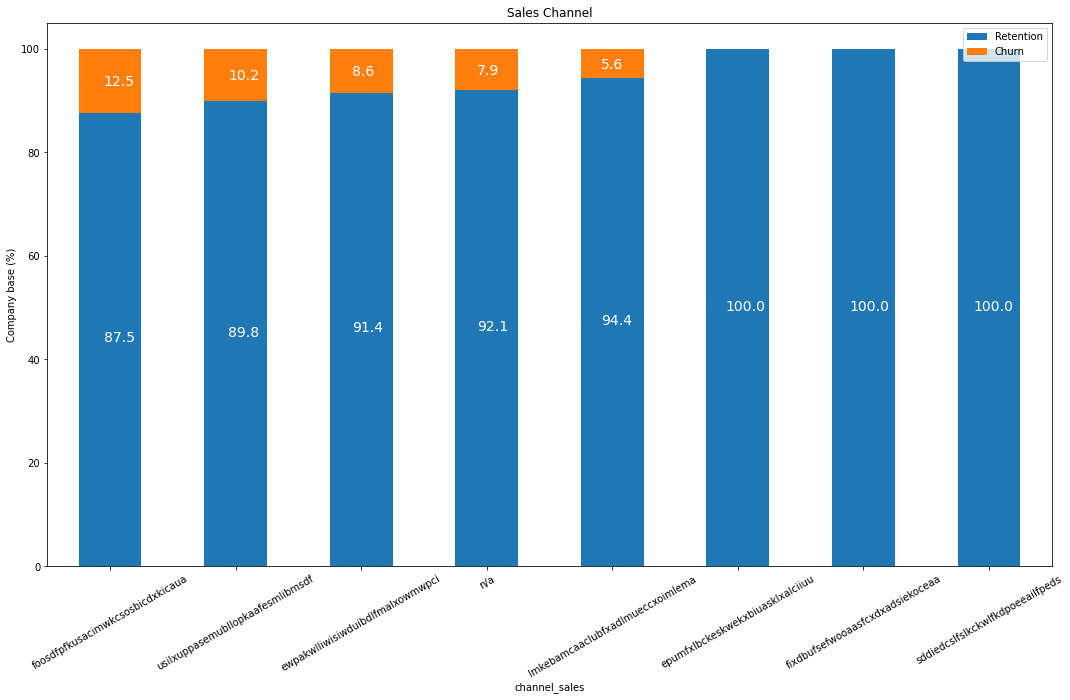

In [93]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)


In [94]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": channel_percentage,
 "Total companies": channel_total }).sort_values(by="Churn percentage",
 ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.453862,7315.0
usilxuppasemubllopkaafesmlibmsdf,10.181311,1434.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.550574,959.0
n/a,7.919824,4091.0
lmkebamcaaclubfxadlmueccxoimlema,5.649158,2018.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


#### contract type (electricity, gas) vs churn

In [95]:
contract_type = my_data[["id", "has_gas", "churn"]]


In [96]:
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract

churn,0,1
has_gas,,
f,11594,1345
t,2664,232


In [97]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
contract_percentage

churn,0,1
has_gas,,
f,89.60507,10.39493
t,91.98895,8.01105


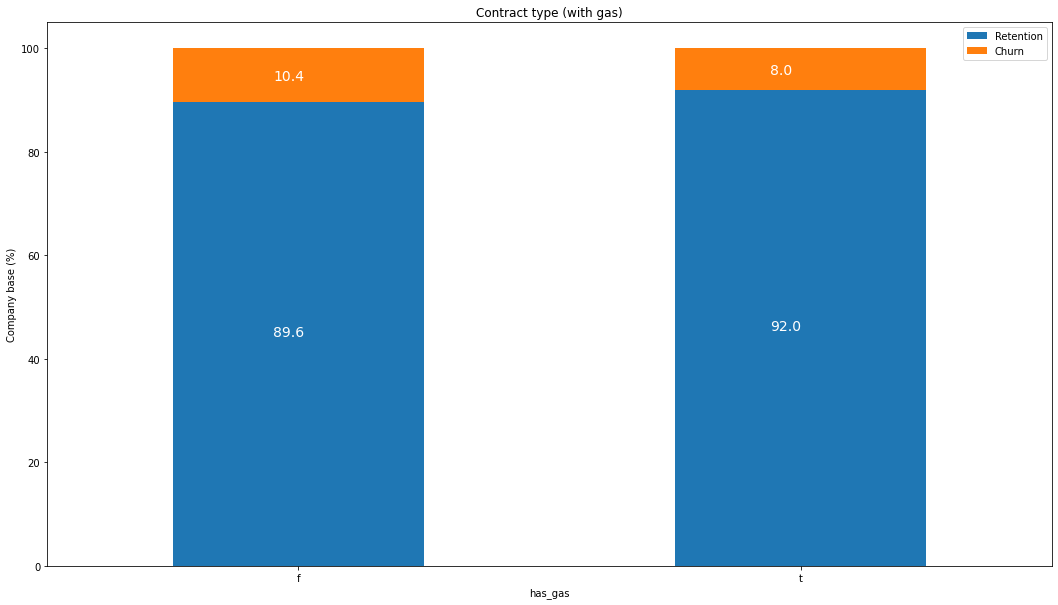

In [98]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")


#### subscribed power vs churn

In [99]:
power = my_data[["id","pow_max", "churn"]]

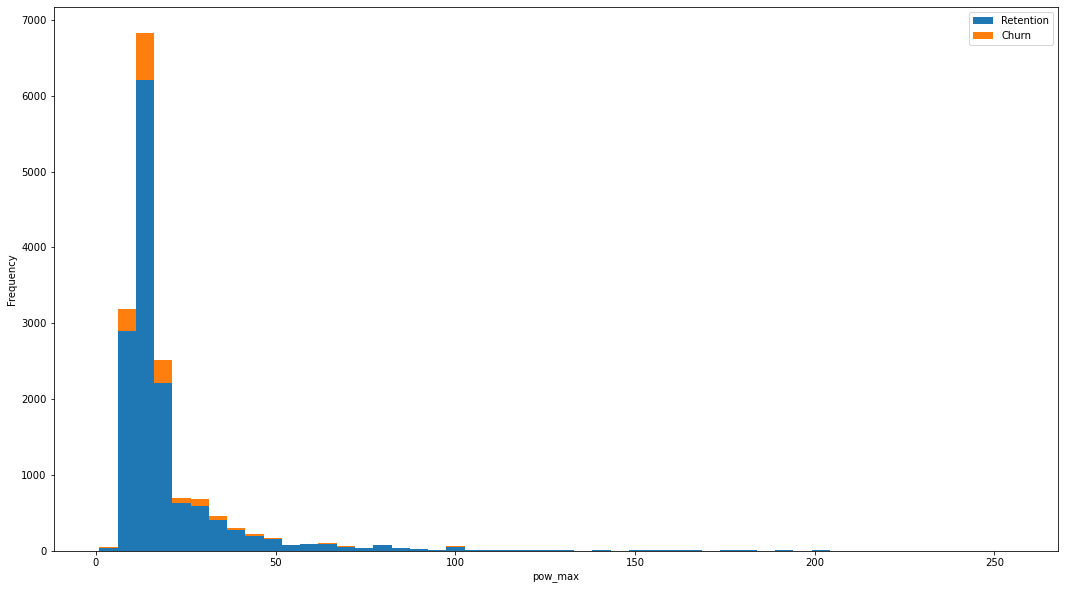

In [100]:
#set a temp
temp = pd.DataFrame({"Retention": power[power["churn"]==0]['pow_max'],
 "Churn":power[power["churn"]==1]['pow_max']})
#plot
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
temp[["Retention","Churn"]].plot(kind='hist', bins=50, ax=axs, stacked=True)
axs.set_xlabel('pow_max')
axs.ticklabel_format(style='plain', axis='x')


#### others vs churn

In [101]:
others = my_data[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

In [102]:
my_data.nb_prod_act.value_counts()

1    12372
2     2686
3      553
4      170
5       37
6        9
8        8
Name: nb_prod_act, dtype: int64

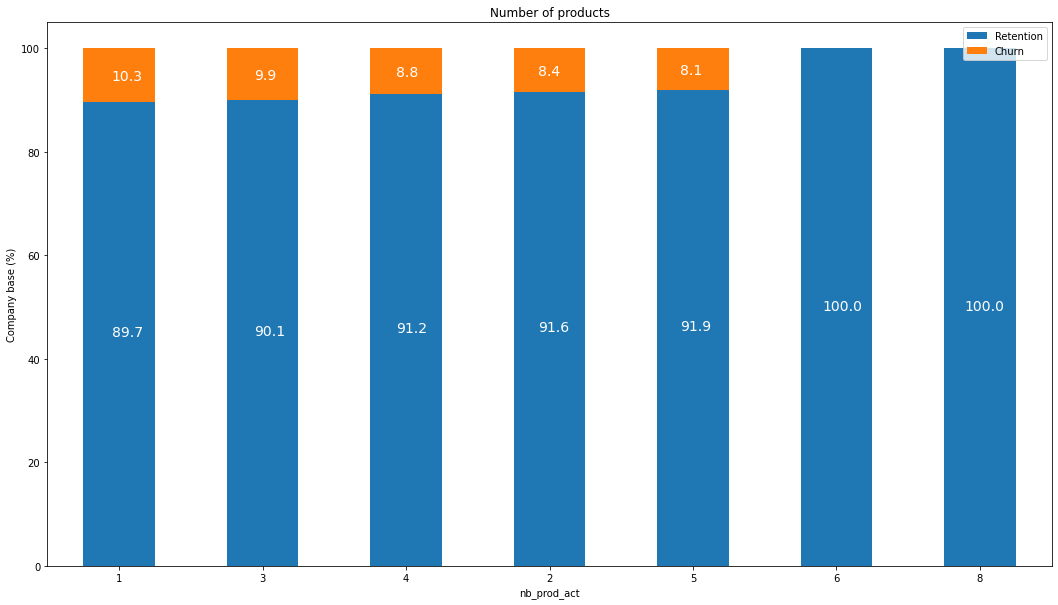

In [103]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")


In [104]:
my_data.num_years_antig.value_counts()

6     4999
4     4296
3     2706
5     2479
7      634
11     234
8      187
12     127
10     109
9       37
13      13
2       11
16       1
1        1
15       1
Name: num_years_antig, dtype: int64

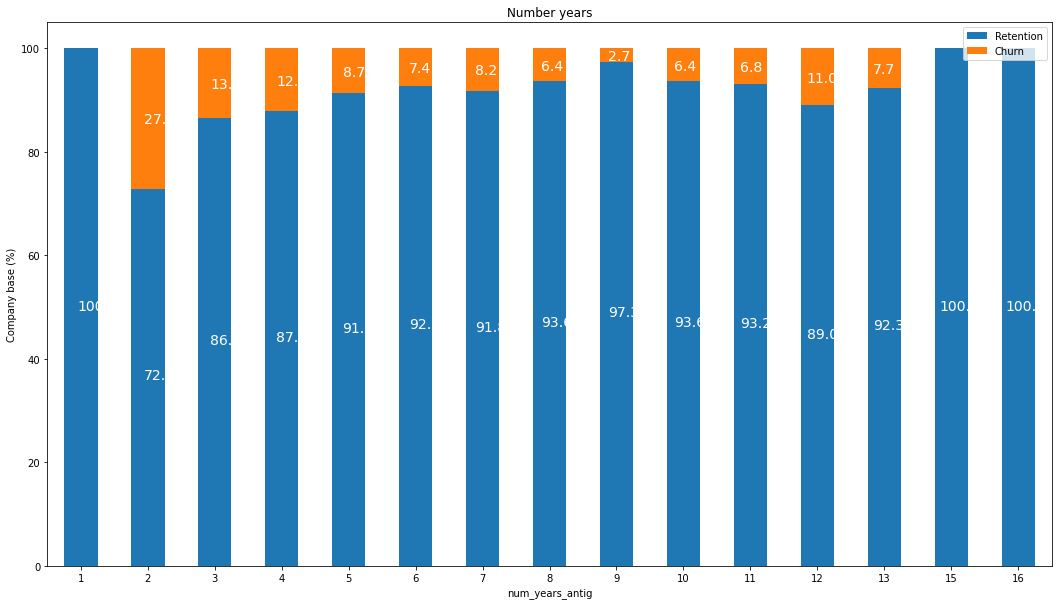

In [105]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

In [106]:
years_antig

churn,0,1
num_years_antig,,
1,1.0,NaN
2,8.0,3.0
3,2343.0,363.0
4,3772.0,524.0
5,2263.0,216.0
6,4631.0,368.0
7,582.0,52.0
8,175.0,12.0
9,36.0,1.0


In [107]:
years_antig.sum(axis=1)

num_years_antig
1        1.0
2       11.0
3     2706.0
4     4296.0
5     2479.0
6     4999.0
7      634.0
8      187.0
9       37.0
10     109.0
11     234.0
12     127.0
13      13.0
15       1.0
16       1.0
dtype: float64

In [108]:
my_data.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7698
kamkkxfxxuwbdslkwifmmcsiusiuosws    4479
ldkssxwpmemidmecebumciepifcamkci    3569
n/a                                   86
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

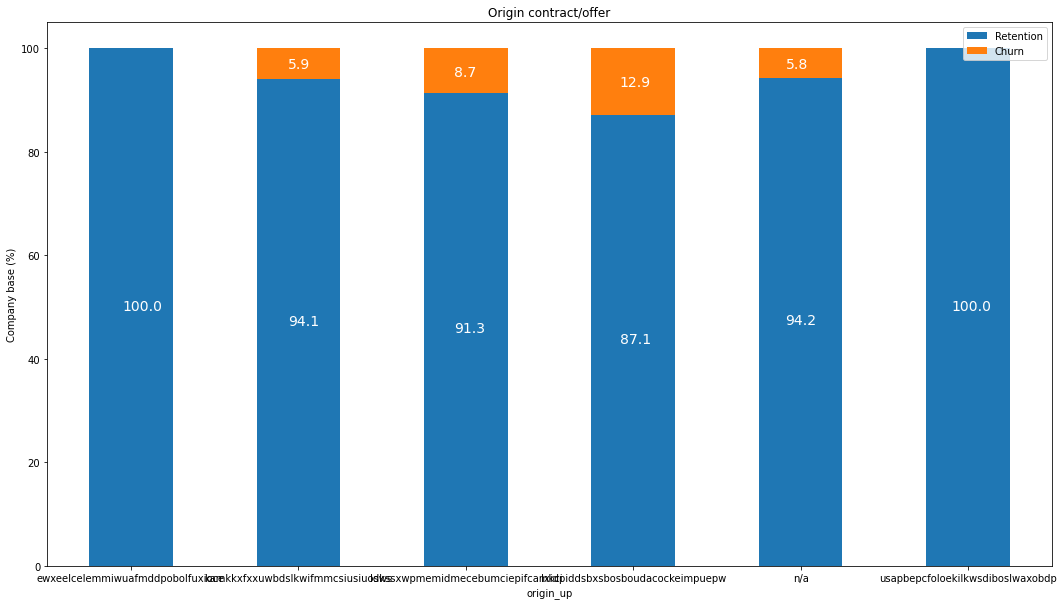

In [109]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")


### dates vs churn

In [110]:
my_data['date_end'].replace({'n/a': my_data['date_end'].value_counts().index[0]}, inplace = True)

In [111]:
my_data['date_renewal'].replace({'n/a': my_data['date_renewal'].value_counts().index[0]}, inplace = True)

In [112]:
my_data["date_end"] = pd.to_datetime(my_data["date_end"], format='%Y-%m-%d')
my_data["date_activ"] = pd.to_datetime(my_data["date_activ"], format = '%Y-%m-%d')
my_data["date_modif_prod"] = pd.to_datetime(my_data["date_modif_prod"], format = '%Y-%m-%d')
my_data["date_renewal"] = pd.to_datetime(my_data["date_renewal"], format = '%Y-%m-%d')

In [113]:
dates = my_data[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()


In [114]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month

Plot date_activ vs churn

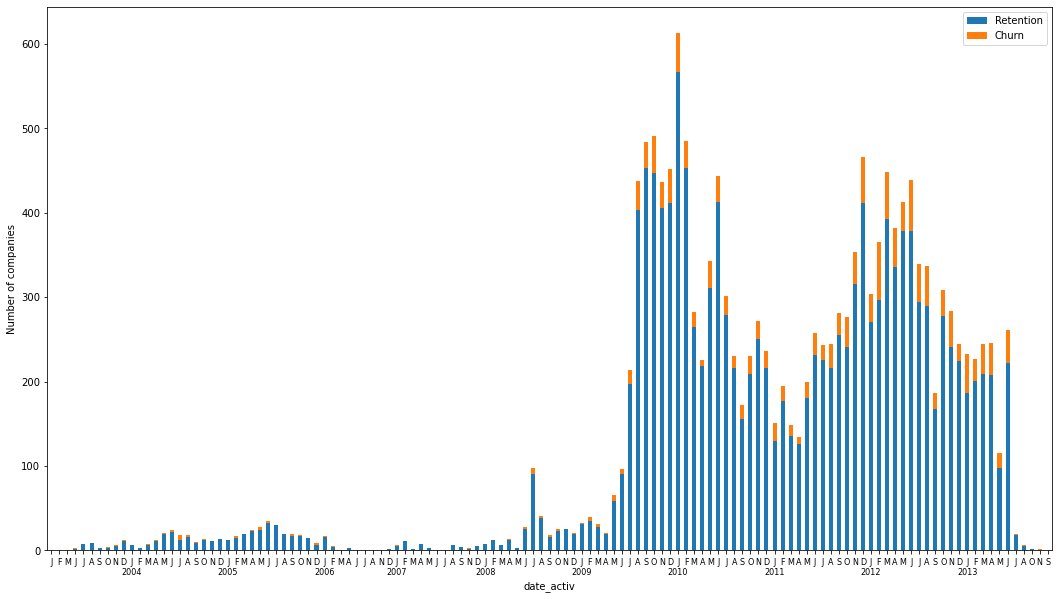

In [115]:
#  Group by month
temp = dates[['date_activ', 'churn', 'id']].set_index('date_activ').groupby([pd.Grouper(freq ='M'), 'churn']).count().unstack(level =1)

#Plot
ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
# Change x-axis labels to months
ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
# Change xlabel size
plt.xticks(fontsize=8)
# Rename y-axis
plt.ylabel("Number of companies")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
plt.show()

Define a function to plot dates vs churn

In [116]:
def plot_dates(dataframe, column, fontsize_=12):
    """
    Plot monthly churn and retention distribution
    """
    # Group by month
    temp = dataframe[[column,
                      "churn",
         "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()
    
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month


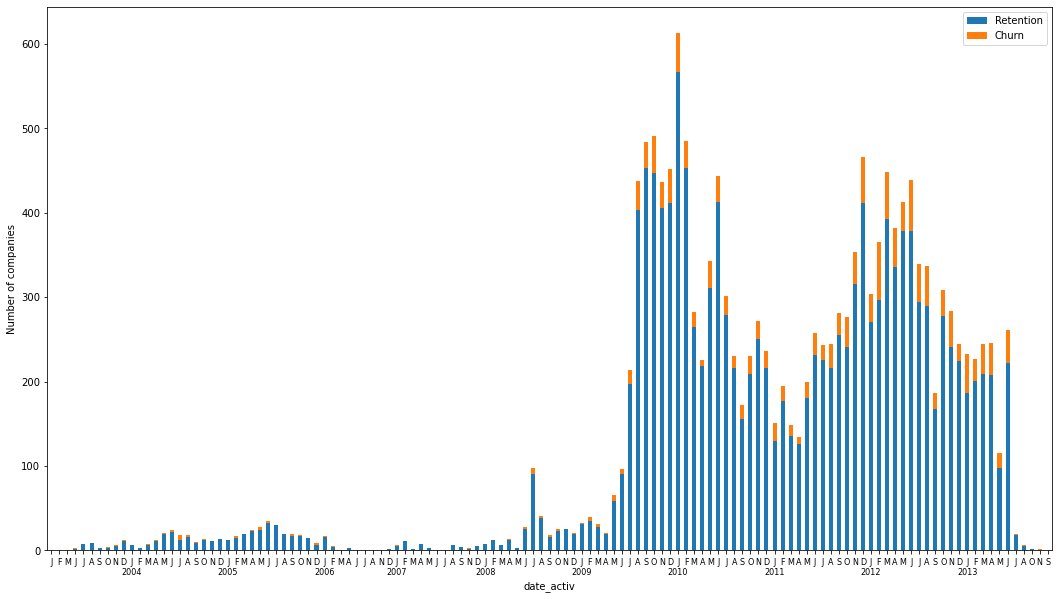

In [117]:
plot_dates(dates, "date_activ", fontsize_=8)


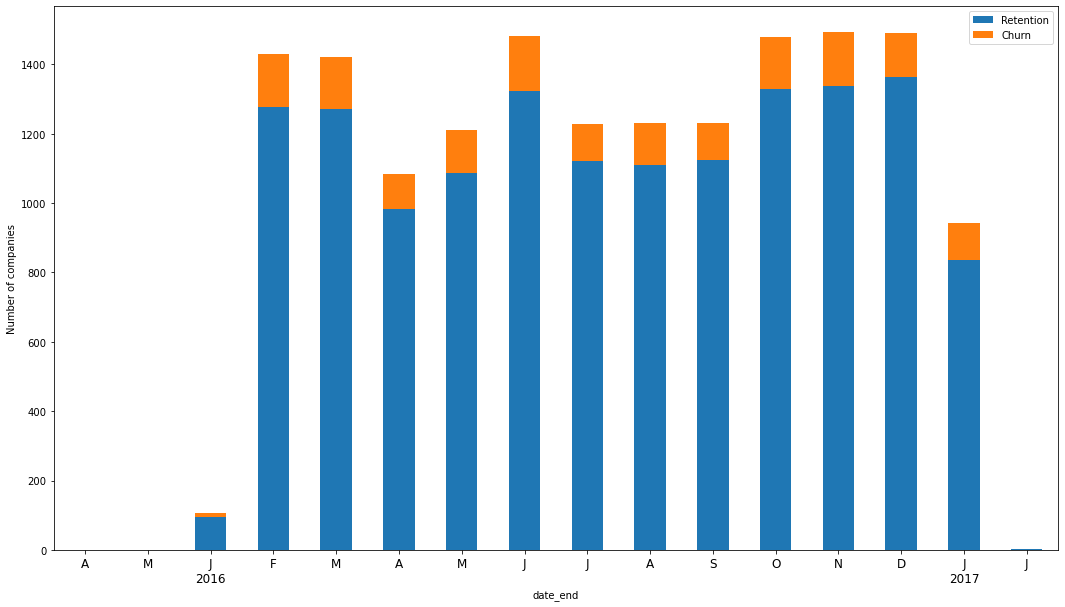

In [118]:
plot_dates(dates, "date_end")

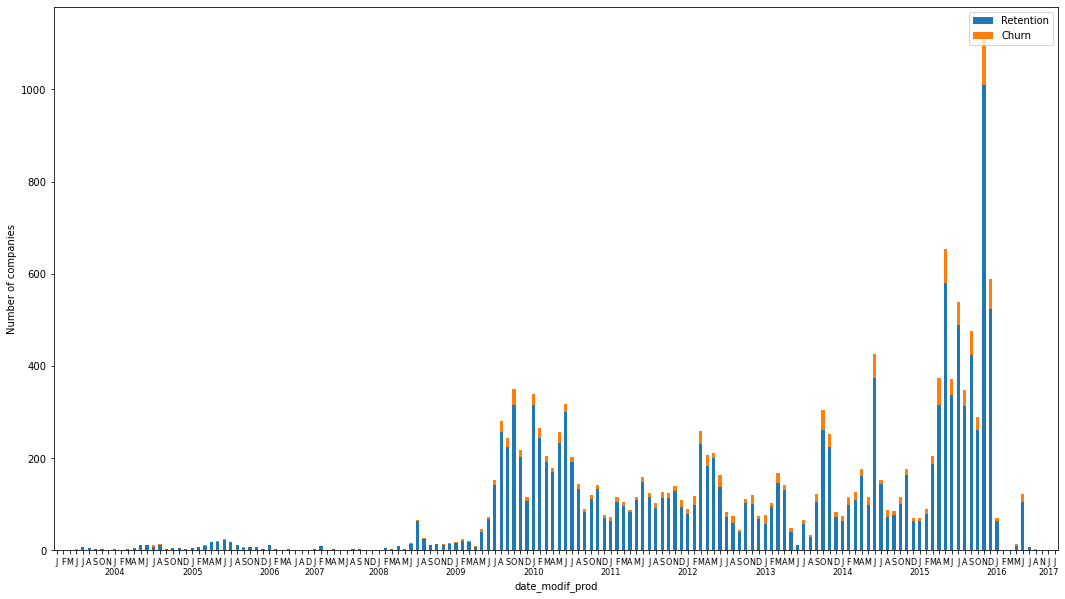

In [119]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

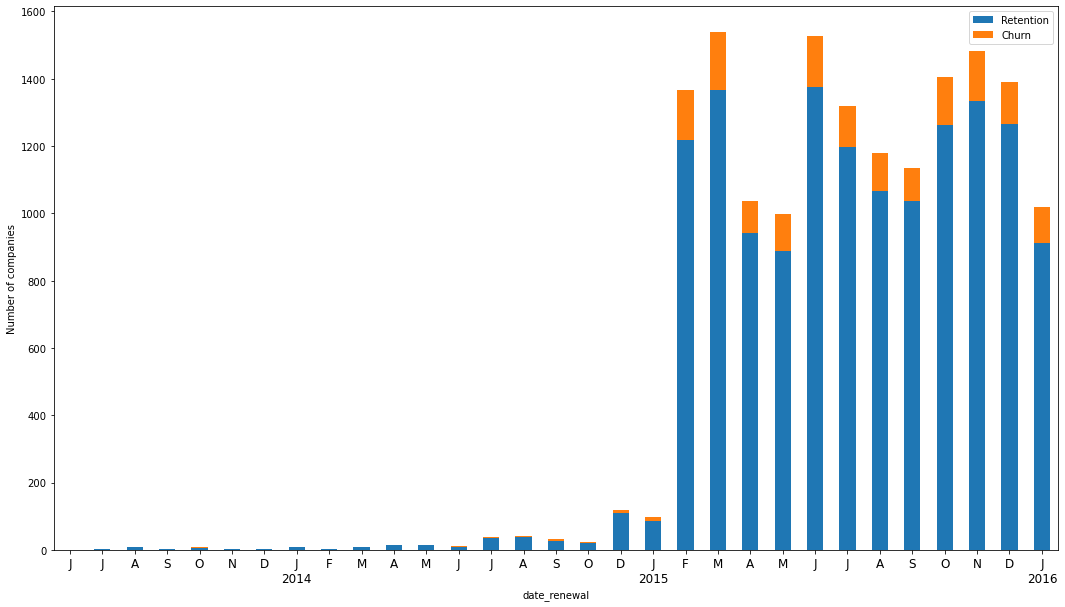

In [120]:
plot_dates(dates, "date_renewal")


### History data

In [121]:
hist_data = pd.read_csv('C:/Users/Guoli/Documents/Data Science Material/Projects/BCG/Task 2/ml_case_training_hist_data.csv')

In [122]:
hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [123]:
hist_data.shape

(193002, 8)

#### Missing values

In [124]:
null_hist = hist_data.isna().sum()
null_hist

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [125]:
null_hist = null_hist[null_hist > 0]
null_hist_percentage = round(null_hist / len(hist_data), 4) *100
null_hist_frame = pd.DataFrame({'Number of null hist': null_hist, 'Percentage': null_hist_percentage})
null_hist_frame

,Number of null hist,Percentage
price_p1_var,1359,0.7
price_p2_var,1359,0.7
price_p3_var,1359,0.7
price_p1_fix,1359,0.7
price_p2_fix,1359,0.7
price_p3_fix,1359,0.7


In [126]:
hist_data.loc[hist_data["price_p1_var"].isnull(),"price_p1_var"] = hist_data["price_p1_var"].median()
hist_data.loc[hist_data["price_p2_var"].isnull(),"price_p2_var"] = hist_data["price_p2_var"].median()
hist_data.loc[hist_data["price_p3_var"].isnull(),"price_p3_var"] = hist_data["price_p3_var"].median()
hist_data.loc[hist_data["price_p1_fix"].isnull(),"price_p1_fix"] = hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"].isnull(),"price_p2_fix"] = hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"].isnull(),"price_p3_fix"] = hist_data["price_p3_fix"].median()


In [127]:
hist_data.isna().sum()

id              0
price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

#### Formatting dates for history data

In [128]:
hist_data["price_date"] = pd.to_datetime(hist_data["price_date"], format='%Y-%m-%d')

#### Negative data

In [129]:
hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for price_p1_fix , price_p2_fix and price_p3_fix .

In [130]:
hist_data[(hist_data.price_p1_fix < 0) | (hist_data.price_p2_fix < 0) | (hist_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather than
a "price discount".

We will replace the negative values with the median (most frequent value)


In [131]:
hist_data.loc[hist_data["price_p1_fix"] < 0,"price_p1_fix"] = hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"] < 0,"price_p2_fix"] = hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"] < 0,"price_p3_fix"] = hist_data["price_p3_fix"].median()


### Save data files for further use

In [133]:
my_data.to_csv('C:/Users/Guoli/Documents/Data Science Material/Projects/BCG/Task 2/my_data.csv', index =False)

In [134]:
hist_data.to_csv('C:/Users/Guoli/Documents/Data Science Material/Projects/BCG/Task 2/hist_data.csv', index = False)